## 1. Probabilistic logic and statistical inference.
### 1.1. Theory.
Imagine you measured the petal lengths of 50 flowers of a certain species. Here is the `ECDF` of those measurements.
#### 50 measurements of petal length.
- From what you have just learned, you can compute the mean of those 50 measurements, and I'll annotate it on the ECDF with a vertical line. That is useful, but there are millions of these flowers on the planet. Can you tell me the mean petal length of all of the flowers of that species?
- If I measure another 50 flowers, I get a similar, but quantitatively different set of measurements. Can you tell me what value I would get for the mean petal length if I measured yet another 50 flowers? We just don't have the language to do that, without probability. Probabilistic reasoning allows us to describe uncertainty. Though you can't tell me exactly what the mean of the next 50 petal lengths you measure will be, you could say that it is more probable to be close to what you got in the first 50 measurements that it is to be much greater.

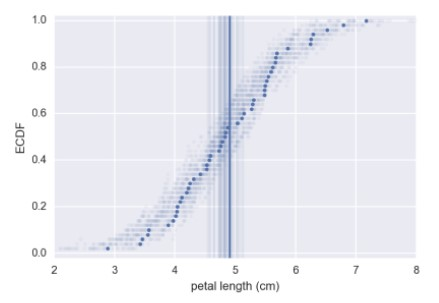

In [1]:
from IPython.display import Image
## Hình minh họa Image(fig1, height, width)

- We can go ahead and repeat the measurements over and over again.

#### Repeats of 50 measurements of petal length
We see from the vertical lines that we expect the mean to be somewhere between 4-point-5 and 5 cm. This is what probabilistic thinking is all about. 
- Given a set of data, you describe probabilistically what you might expect if those data were acquired again and again and again. 
- This is the heart of statistical inference. It is the process by which we go from measured data to probabilistic conclusions about what we might expect if we collected the same data again. Your data speak in the language of probability.

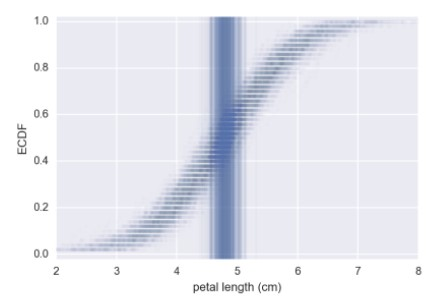

In [2]:
## Hình minh họa Image(fig1, height, width)

### 1.2. PRACTICES.
#### Exercise 1.2.1. What is the goal of statistical inference?
Why do we do statistical inference?
>- A. To draw probabilistic conclusions about what we might expect if we collected the same data again.
>- B. To draw actionable conclusions from data.
>- C. To draw more general conclusions from relatively few data or observations.
>- D. All of these.
#### Answers & explainations
>- A, B, C. True but it is not enough!
>- **D. Correct!** Statistical inference involves taking your data to probabilistic conclusions about what you would expect if you took even more data, and you can make decisions based on these conclusions.

#### Exercise 1.2.2. Why do we use the language of probability?
Which of the following is not a reason why we use probabilistic language in `statistical inference`?
>- A. Probability provides a measure of uncertainty.
>- B. Probabilistic language is not very precise.
>- C. Data are almost never exactly the same when acquired again, and probability allows us to say how much we expect them to vary.
#### Answers & explainations.
>- A. Incorrect!! Probability is a measure of uncertainty, and this is crucial because we can quantify what we might expect if the data were acquired again.
>- **B. Correct.** Probabilistic language is in fact very precise. It precisely describes uncertainty
>- C. Wrong!! We need probability to say how data might vary if acquired again.

## 2. Random number generators and hacker statistics
In practice, we are going to think probabilistically using `hacker statistics`. 
### 2.1. Theory.
#### Hacker statistics
The basic idea is that instead of literally repeating the data acquisition over and over again, we can simulate those repeated measurements using `Python`. For our first simulation, we will take a cue from our forebears.
####  Coins
The concepts of probability originated from studies of games of chance by Pascal and others in the 17th century, so we will simulate coin flips. 
- Specifically, we will simulate the outcome of 4 successive coin flips. 
- Our goal is to compute the probability that we will get four heads out of four flips.

#### The `np.random` module
`Numpy's random module`, a suite of functions based on `pseudorandom number generation`, will be your main engine for doing this. To simulate a coin flip, we will use the function `np.random.random`, which draws a number between zero and one such that all numbers in this interval are equally likely to occur.
- If the number we draw is less than `point-5`, which has a `50% chance` of happening, we say we got `heads`, and we get tails otherwise. This type of experiment, where the result is either True (heads) or False (tails) is referred to as a `Bernoulli trial`, and we will work with these more as we go through the course. 

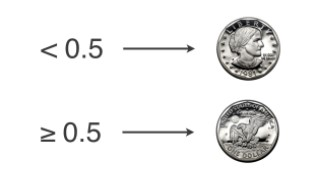

In [3]:
## Hình minh họa Image(fig1, height, width)

- The `pseudorandom number` generator works by starting with an `integer`, called a `seed`, and then generates random numbers in succession. The same `seed` gives the same sequence of random numbers, hence the name, `"psuedorandom number generation"`. So, if you want to have reproducible code, it is a good idea to seed the random number generator using the `np.random.seed` function.

#### Simulating 4 coin flips
Now, to do our coin flips, we import `NumPy`, seed the random number generator, and then draw four random numbers. Conveniently, we can specify how many random numbers we want with the size keyword argument. 
- The first number we get is less than one half, so it is a heads, but the remaining three are tails. We can show that explicitly using the less than operation, which gives us an array with the `Boolean` value `True` for heads and `False` for tails.
- We can compute the number of heads by summing the `array` of `Booleans` because in numerical contexts, `Python` treats `True` at one and `False` as zero. 
- We want to know the probability of getting four heads if we were to repeat the four flips over and over again. 
- We can do this with a for loop.

In [4]:
import numpy as np
np.random.seed(12)
random_numbers = np.random.random(size = 4)
print(random_numbers)

# print the number of outcome is head?
heads = random_numbers < 0.5
print(heads)

# compute number of heads
print(heads.sum())

[0.15416284 0.7400497  0.26331502 0.53373939]
[ True False  True False]
2


>- We first initialize the count to zero. We then do 10,000 repeats of the four-flip trials. If a given trial had four heads, we increase the count. 
>- So, what is the probability of getting all four heads? It's the number of times we got all heads, divided by the total number of trials we did. 

The result is about point-06. Pascal and his friends did not have computers and worked out problems like these with pen and paper. While this particular problem is tractable, pen-and-paper statistics can get hard fast.

In [5]:
sims = 10000             # Number of simulation tossing 4 coins
n_all_heads = 0          # Initialize number of 4 heads-trials
for _ in range(sims):
    is_head = np.random.random(size = 4) < 0.5  # each outcome is head or not?
    n_heads = is_head.sum()                     # total head occurs
    if n_heads == 4:
        n_all_heads += 1
print("Probability of this simulation = %s"%(n_all_heads / sims))

Probability of this simulation = 0.0643


#### Hacker stats probabilities
With hacker statistics, you pretty much do this same procedure every time. Figure out how to simulate your data, simulate it many many times, and then compute the fraction of trials that had the outcome you're interested in.

### 2.2. PRACTICES.
#### Exercise 2.2.1. Generating random numbers using the np.random module
We will be hammering the `np.random module` for the rest of this course and its sequel. Actually, you will probably call functions from this module more than any other while wearing your hacker statistician hat. Let's start by taking its simplest function, `np.random.random()` for a test spin. The function returns a random number between zero and one. Call `np.random.random()` a few times in the IPython shell. You should see numbers jumping around between zero and one.

In this exercise, we'll generate lots of random numbers between zero and one, and then plot a `histogram` of the results. If the numbers are truly random, all bars in the histogram should be of (close to) equal height.

You may have noticed that, in the video, Justin generated 4 random numbers by passing the keyword argument `size=4` to `np.random.random()`. Such an approach is more efficient than a `for loop`: in this exercise, however, you will write a for loop to experience hacker statistics as the practice of repeating an experiment over and over again. 
#### SOLUTION.

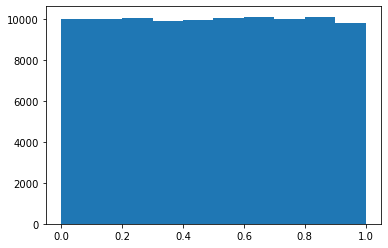

In [6]:
import matplotlib.pyplot as plt

# Seed the random number generator
np.random.seed(42)

# Initialize random numbers: random_numbers
random_numbers = np.empty(100000)

# Generate random numbers by looping over range(100000)
for i in range(100000):
    random_numbers[i] = np.random.random()

# Plot a histogram
_ = plt.hist(random_numbers)

# Show the plot
plt.show()

**Comments** The histogram is almost exactly flat across the top, indicating that there is equal chance that a randomly-generated number is in any of the bins of the histogram.

#### Exercise 2.2.2. The np.random module and Bernoulli trials
You can think of a `Bernoulli trial` as a flip of a possibly biased coin. Specifically, each coin flip has a probability  of landing heads `(success)` and probability  of landing tails `(failure)`. 

In this exercise, you will write a function to perform `n` Bernoulli trials, `perform_bernoulli_trials(n, p)`, which returns the number of successes out of `n` Bernoulli trials, each of which has probability `p` of success. 

To perform each Bernoulli trial, use the `np.random.random()` function, which returns a random number between zero and one.
#### SOLUTION.

In [7]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0

    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()

        # If less than p, it's a success so add one to n_success
        if random_number < p:
            n_success += 1

    return n_success

#### Exercise 2.2.3. How many defaults might we expect?
Let's say a bank made 100 mortgage loans. It is possible that anywhere between 0 and 100 of the loans will be defaulted upon. You would like to know the probability of getting a given number of defaults, given that the probability of a default is `p = 0.05`. To investigate this, you will do a simulation.

You will perform 100 Bernoulli trials using the `perform_bernoulli_trials()` function you wrote in the previous exercise and record how many defaults we get. 

Here, a success is a default. (Remember that the word "success" just means that the Bernoulli trial evaluates to `True`, i.e., did the loan recipient default?) You will do this for another 100 Bernoulli trials. And again and again until we have tried it 10000 times. Then, you will plot a histogram describing the probability of the number of defaults.

#### SOLUTION.

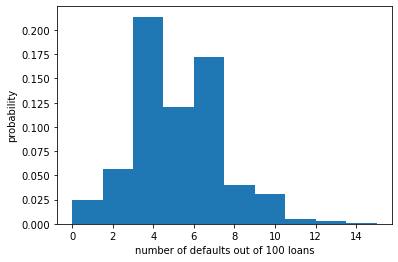

In [8]:
# Seed random number generator
np.random.seed(42)

# Initialize the number of defaults: n_defaults
n_defaults = np.empty(10000)

# Compute the number of defaults
for i in range(10000):
    n_defaults[i] = perform_bernoulli_trials(n = 100, p = 0.05)


# Plot the histogram with default number of bins; label your axes
_ = plt.hist(n_defaults, density = True)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

# Show the plot
plt.show()

#### Exercise 2.2.4. Will the bank fail?
Plot the number of defaults you got from the previous exercise, in your namespace as `n_defaults`, as a `CDF`. The `ecdf()` function you wrote in the [first chapter](https://github.com/Nhan121/Lectures_notes-teaching-in-VN-/blob/master/Statistics/Testing%20Hypothesis/Statistical%20Thinking/Graphical%20exploratory%20data%20analysis.ipynb) is loaded.

In [9]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y

**Question.** If interest rates are such that the bank will lose money if 10 or more of its loans are defaulted upon, what is the probability that the bank will lose money?
#### SOLUTION.

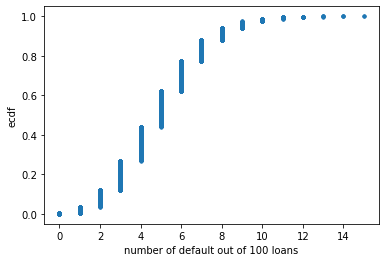

Probability of losing money = 0.0263


In [10]:
# Compute ECDF: x, y
x,y = ecdf(n_defaults)

# Plot the ECDF with labeled axes
_ = plt.plot(x, y, marker = '.', linestyle = 'none')
_ = plt.xlabel('number of default out of 100 loans')
_ = plt.ylabel('ecdf')

# Show the plot
plt.show()

# Compute the number of 100-loan simulations with 10 or more defaults: n_lose_money
n_lose_money = np.sum((n_defaults >= 10))

# Compute and print probability of losing money
print('Probability of losing money =', n_lose_money / len(n_defaults))

**Comment.** As we might expect, we most likely get 5/100 defaults. But we still have about a 2% chance of getting 10 or more defaults out of 100 loans.
## 3. Probability distributions and stories: The Binomial distribution
### 3.1. Theory.
In the last section, we simulated a story about a person flipping a coin. We did this to get the probability for each possible outcome of the story. That set of probabilities is called a `probability mass function (PMF)`
#### Probability mass function (PMF)
A `PMF` is defined as the set of probabilities of discrete outcomes. 
- To understand how this works, consider a simpler story, a person rolling a die once.
- The outcomes are discrete because only certain values may be attained; you cannot roll a 3-point-7 with a die. Each result has the same, or `uniform probability`, 1/6. 

For this reason, the `PMF` associated with this story is called the `Discrete Uniform PMF`. 

Now the PMF is a property of a discrete probability distribution.

#### Probability distribution
A distribution is just a mathematical description of outcomes. We can match a story to a mathematical description of probabilities, as we have just seen with the `Discrete Uniform distribution`.

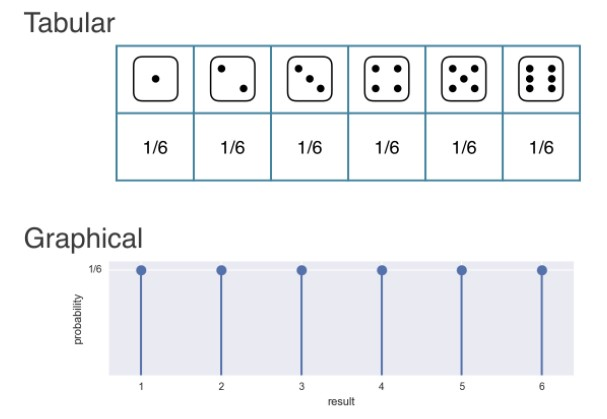

In [11]:
## Hình minh họa Image(fig1, height, width)

#### Discrete Uniform distribution: the story
The story we simulated in the last video corresponds to the Binomial distribution. Its story is as follows:
>- **Binomial distribution.** the number r of successes in n Bernoulli trials with probability p of success is Binomially distributed. The number of heads in four coin flips matches this story, since a coin flip is a Bernoulli trial with `p = point-5`.
>- **Sampling from the Binomial distribution.** We call the function `np.random.binomial` with two arguments, the number of Bernoulli trials (coin flips) and the probability of success (heads). We get 2 heads out of four. We want repeat the four-flip experiment over and over again. Again, we can specify the size keyword argument, which tells the function how many random numbers to sample out of the Binomial distribution.

In [12]:
np.random.binomial(4, 0.5, size = 10)

array([2, 2, 0, 2, 3, 2, 3, 1, 1, 3])

>- **The Binomial PMF** To be able to plot the Binomial PMF, we'll draw 10,000 samples from a Binomial distribution where we do 60 Bernoulli trials with a probability of success of point-1. If we do this over and over and tally the results, we can plot the PMF. As expected the most likely number of successes is 6 out of 60, but we may expect to get as many as 11 or as few as 1. Unfortunately, while this is a proper way to display a PMF, it is not the easiest to implement with `Matplotlib`.

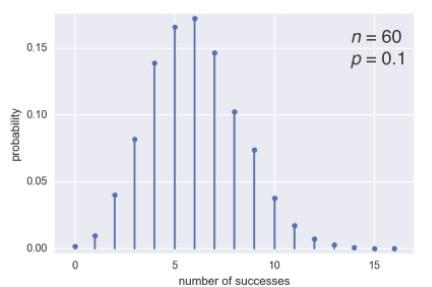

In [13]:
## Hình minh họa Image(fig1, height, width)

>- **The Binomial CDF.** The `CDF` is just as informative and easier to plot just as we have done before, and here it is. Now that you know the story of the binomial distribution, have a feel for how it looks, and know how to sample out of it,

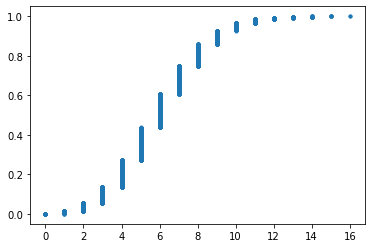

In [14]:
n, p = 60, 0.1
samples = np.random.binomial(n, p, size = 10000)
x, y = ecdf(samples)
_ = plt.plot(x, y, marker = '.', linestyle = 'none')
plt.show()

### 3.2. PRACTICES.
#### Exercise 3.2.1. Sampling out of the Binomial distribution
Compute the probability mass function for the number of defaults we would expect for 100 loans as in the last section, but instead of simulating all of the Bernoulli trials, perform the sampling using `np.random.binomial()`. 

This is **identical** to the calculation you did in the last set of exercises using your custom-written `perform_bernoulli_trials()` function, but far more computationally efficient. Given this extra efficiency, we will take 10,000 samples instead of 1000. After taking the samples, plot the `CDF` as last time. This `CDF` that you are plotting is that of the Binomial distribution.
#### SOLUTION.

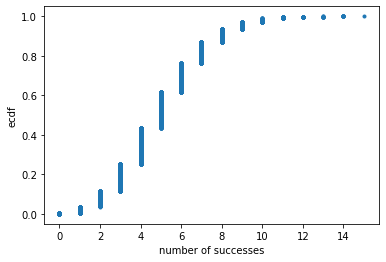

In [15]:
# Take 10,000 samples out of the binomial distribution: n_defaults
n_defaults = np.random.binomial(n = 100, p = 0.05, size = 10000)

# Compute CDF: x, y
x, y = ecdf(n_defaults)

# Plot the CDF with axis labels
_ = plt.plot(x, y, marker = '.', linestyle = 'none')
_ = plt.xlabel('number of successes')
_ = plt.ylabel('ecdf')

# Show the plot
plt.show()

#### Exercise 3.2.2. Plotting the Binomial PMF
As mentioned in the video, plotting a nice looking PMF requires a bit of matplotlib trickery that we will not go into here. Instead, we will plot the `PMF` of the `Binomial distributio`n as a histogram with skills you have already learned.
- The trick is setting up the edges of the bins to pass to `plt.hist()` via the bins keyword argument.
- We want the bins centered on the integers. So, the edges of the bins should be `-0.5, 0.5, 1.5, 2.5, ...` up to `max(n_defaults) + 1.5`. You can generate an `array` like this using `np.arange()` and then subtracting `0.5` from the array.

You have already sampled out of the Binomial distribution during your exercises on loan defaults, and the resulting samples are in the NumPy array `n_defaults`.
#### SOLUTION.

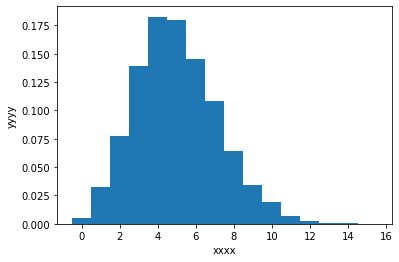

In [16]:
# Compute bin edges: bins
bins = np.arange(0, max(n_defaults) + 1.5) - 0.5

# Generate histogram
_ = plt.hist(n_defaults, bins = bins, density = True)

# Label axes
_ = plt.xlabel('xxxx')
_ = plt.ylabel('yyyy')

# Show the plot
plt.show()

## 4. Poisson processes and the Poisson distribution
In his great book on information theory, statistical inference, and machine learning, David MacKay described a town called Poissonville where the buses have a very erratic schedule. If you stand at a bus stop in Poissonville, the amount of time you have to wait for a bus is completely independent of when the previous bus arrived. In other words, you would watch a bus drive off and another one will arrive almost instantly, or you could be waiting for hours. Arrival of buses in Poissonville is what we call a Poisson process. 
### 4.1. Theory.
The timing of the next event is completely independent of when the previous event happened. Many real-life processes behave in this way.
#### Examples of Poisson processes
For example, 
>- natural births in a given hospital are a Poisson process. There is a well-defined average number of natural births per year, and the timing of one birth is independent of the timing of the previous one.
>- Another example is hits on a website. The timing of the next hit is independent of the timing of the last.
>- There are countless other examples. Any process that matches the buses in Poissonville story is a Poisson process.

The number of arrivals of a Poisson process in a given amount of time is `Poisson distributed`.
#### Poisson distribution
The Poisson distribution has one parameter, the average number of arrivals in a given length of time $\lambda$. So, to match the story, we could consider the number of hits on a website in an hour with an average of six hits per hour. This is Poisson distributed.

$$ P[\text{Poisson} = k] = e^{-\lambda} \dfrac{\lambda^k}{k!}, \qquad \forall k = 0,1,2,\ldots $$
#### Poisson PMF
Let's take a look at the `PMF` for this example. For a given hour, we are most likely to get 6 hits, which is the average, but we may get more than ten, or possibly none.

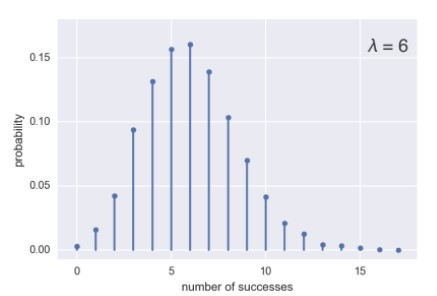

In [17]:
## Hình minh họa Image(fig1, height, width)

 You might notice that this looks an awful lot like the Binomial PMF we looked at in the last video. This is because the Poisson distribution is a limit of the Binomial distribution for low probability of success and large number of trials, ie for rare events. You'll explore this relationship further in the following interactive exercises.

#### The Poisson CDF
To sample from the Poisson distribution, we use np dot random dot poisson. It also has the size keyword argument to allow multiple samples. Let's use this function to generate the Poisson CDF. After that it is the usual procedure of computing the ECDF, plotting it, and labeling axes.

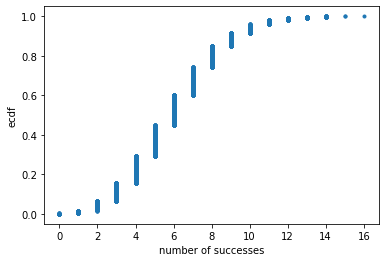

In [18]:
# Take 10,000 samples out of the binomial distribution: n_defaults
n_defaults = np.random.poisson(6, size = 10000)

# Compute CDF: x, y
x, y = ecdf(n_defaults)

# Plot the CDF with axis labels
_ = plt.plot(x, y, marker = '.', linestyle = 'none')
_ = plt.xlabel('number of successes')
_ = plt.ylabel('ecdf')

# Show the plot
plt.show()

### 4.2. PRACTICES.
#### Exercise 4.2.1. Relationship between Binomial and Poisson distributions
You just heard that the Poisson distribution is a limit of the Binomial distribution for rare events. This makes sense if you think about the stories. Say we do a Bernoulli trial every minute for an hour, each with a success probability of 0.1. We would do 60 trials, and the number of successes is Binomially distributed, and we would expect to get about 6 successes. This is just like the Poisson story we discussed in the video, where we get on average 6 hits on a website per hour. So, the Poisson distribution with arrival rate equal to  approximates a Binomial distribution for $n$ Bernoulli trials with probability $p$ of success (with $n$ large and $p$ small). Importantly, the Poisson distribution is often simpler to work with because it has only one parameter instead of two for the Binomial distribution.

Let's explore these two distributions computationally. You will compute the mean and standard deviation of samples from a Poisson distribution with an arrival rate of 10. Then, you will compute the mean and standard deviation of samples from a Binomial distribution with parameters $n$ and $p$ such that $np = 10$.
#### SOLUTION.

In [19]:
# Draw 10,000 samples out of Poisson distribution: samples_poisson
samples_poisson = np.random.poisson(10, size = 10000)

# Print the mean and standard deviation
print('Poisson:     ', np.mean(samples_poisson),
                       np.std(samples_poisson))

# Specify values of n and p to consider for Binomial: n, p
n, p = [20, 100, 1000], [0.5, 0.1, 0.01]


# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(3):
    samples_binomial = np.random.binomial(n = n[i], p = p[i], size = 10000)

    # Print results
    print('n =', n[i], 'Binom:', np.mean(samples_binomial),
                                 np.std(samples_binomial))

Poisson:      10.0038 3.133334575177059
n = 20 Binom: 9.9779 2.2324452042547427
n = 100 Binom: 10.0313 3.006512981844582
n = 1000 Binom: 9.9837 3.124137370539266


#### Exercise 4.2.2. How many no-hitters in a season?
In baseball, a no-hitter is a game in which a pitcher does not allow the other team to get a hit. This is a rare event, and since the beginning of the so-called modern era of baseball (starting in 1901), there have only been 251 of them through the 2015 season in over 200,000 games. The `ECDF` of the number of no-hitters in a season is shown to the right. 

Which probability distribution would be appropriate to describe the number of no-hitters we would expect in a given season?
>- A. Discrete uniform
>- B. Binomial
>- C. Poisson
>- D. Both Binomial and Poisson, though Poisson is easier to model and compute.
>- E. Both Binomial and Poisson, though Binomial is easier to model and compute.
#### Answers
>- A. Incorrect!! If all possibilities of of number of no-hitters were equally likely, what would set the maximum? Possibly the total number of games in a season. If this were the case, a huge number of no-hitters would be equally as probable as none.
>- B. Incorrect!! Yes, it is Binomial, with each game being a Bernoulli trial. But think about how you can determine the parameters, n and p of the distribution. Further, is p small and n large?
>- C. Incorrect!! Yes, you can use the Poisson distribution. But remember: the Poisson distribution is a limit of the Binomial distribution when the probability of success is small and the number of Bernoulli trials is large.
>- **D. Correct!!** When we have rare events (low p, high n), the Binomial distribution is Poisson. This has a single parameter, the mean number of successes per time interval, in our case the mean number of no-hitters per season.
>- E. Incorrect!! Yes, the Binomial or Poisson distribution correctly describe the number of no-hitters in a given amount of games. However, the Poisson distribution has a single parameter, while the Binomial distribution has two, as discussed in the previous exercise.

#### Exercise 4.2.3. Was 2015 anomalous?
1990 and 2015 featured the most no-hitters of any season of baseball (there were seven). Given that there are on average 251/115 no-hitters per season, what is the probability of having seven or more in a season?
#### SOLUTION,

In [20]:
# Draw 10,000 samples out of Poisson distribution: n_nohitters
n_nohitters = np.random.poisson(251 / 115, size = 10000)

# Compute number of samples that are seven or greater: n_large
n_large = np.sum(n_nohitters >= 7)

# Compute probability of getting seven or more: p_large
p_large = n_large / 10000

# Print the result
print('Probability of seven or more no-hitters:', p_large)

Probability of seven or more no-hitters: 0.005
